# Data Preparation

In [3]:
#Load the dataset
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-01-24 16:28:42--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-01-24 16:28:42--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05725c3e5f52384d06fcafd581.dl.dropboxusercontent.com/cd/0/inline/BHmtwhvSFuW9vATreaGV75XOqTraDqHAGDYf-_Ju-fmdfjj3h0WvoF1NLAsa6EuBxxEj3dmsJIJ_cCxsAdq1y19YFJjCjiaUwEWT5Xu4Yc1GPIRocI6xpGZCshf5OIifYgM/file# [following]
--2021-01-24 16:28:42--  https://uc05725c3e5f52384d06fcafd581.dl.dropboxusercontent.com/cd/0/inline/BHmtwhvSFuW9vATreaGV75XOqTraDqHAGDYf-_Ju-fmdfjj3h0WvoF1NLAsa6EuBxxEj3dmsJIJ_cCxsAdq1y19YFJjCjiaUwEW

In [4]:
#unzip the data
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


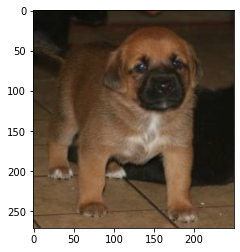

In [5]:
#visualize the data
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('training_set/training_set/dogs/dog.3459.jpg')
imgplot = plt.imshow(img)
plt.show()

In [6]:
#importing libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image

In [7]:
print(tensorflow.__version__)

2.4.0


In [8]:
#initialize the parameters
img_width, img_height = 150, 150
train_data_dir = r"training_set/training_set"
validation_data_dir = r"test_set/test_set"
nb_train_samples = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

In [9]:
#reshaping the images based on channel position
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)


In [10]:
#generating images for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=batch_size, class_mode='binary', classes=['cats', 'dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), 
                                                        batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


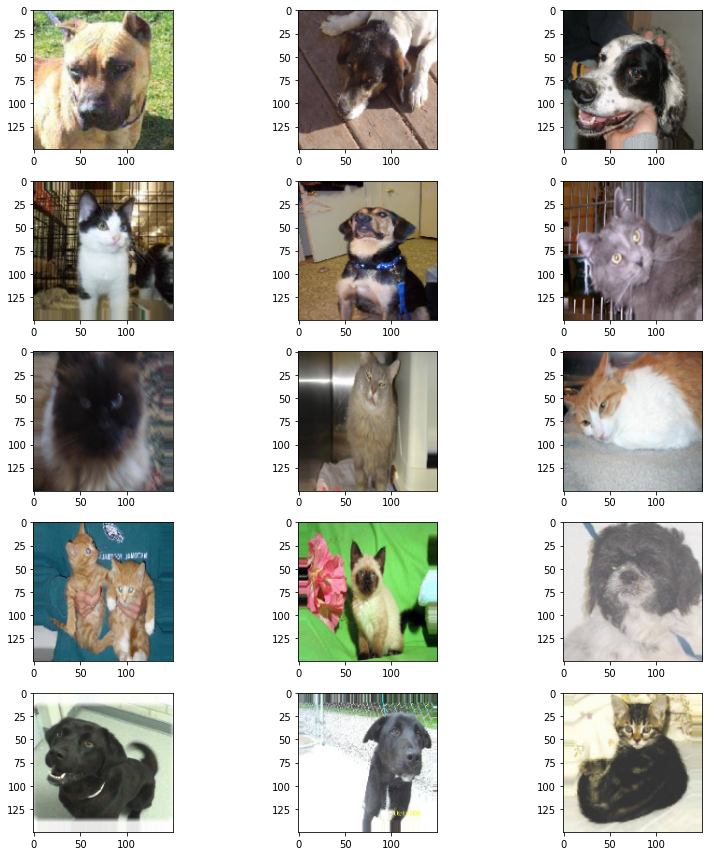

In [11]:
#visualize images after generation
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# Basic CNN Model1

In [45]:
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                22429760  
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [46]:
#compile the model
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                22429760  
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [47]:
#fit the model
training = model1.fit_generator(train_generator, steps_per_epoch=nb_train_samples, epochs=10,
                                validation_data=validation_generator,
                                validation_steps=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 19s 189ms/step - loss: 2.4688 - accuracy: 0.5144 - val_loss: 0.9726 - val_accuracy: 0.5050
Epoch 2/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6953 - accuracy: 0.5641 - val_loss: 0.6457 - val_accuracy: 0.6370
Epoch 3/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6505 - accuracy: 0.6510 - val_loss: 0.6599 - val_accuracy: 0.6045
Epoch 4/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6517 - accuracy: 0.6305 - val_loss: 0.6311 - val_accuracy: 0.6540
Epoch 5/10
100/100 [==============================] - 19s 188ms/step - loss: 0.6067 - accuracy: 0.7027 - val_loss: 0.5759 - val_accuracy: 0.7045
Epoch 6/10
100/100 [==============================] - 19s 187ms/step - loss: 0.5920 - accuracy: 0.7008 - val_loss: 0.6347 - val_accuracy: 0.6540
Epoch 7/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6040 - accuracy: 0.6846 - val_loss: 0.5961 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


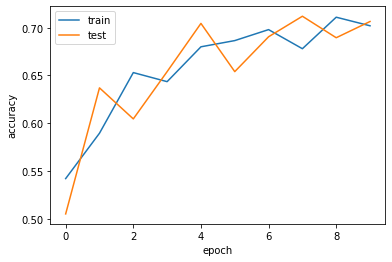

In [48]:
#plotting the accuracy
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.99999726]]
Prediction: Cat


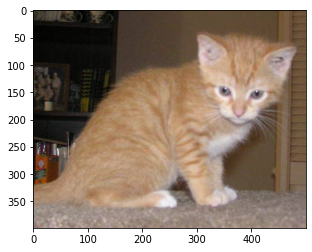

In [59]:
#predict the image
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred = image.load_img('test_set/test_set/cats/cat.4003.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction='Dog'
else:
  prediction = 'Cat'

print('Prediction:', prediction)

img=mpimg.imread('test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

# Model2 with multiple layers

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

In [50]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2,
#                                            verbose=1, factor=0.5, min_lr=0.00001)

#callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
#model2.add(Dropout(0.25))

model2.add(Flatten())
model1.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax'))

In [51]:
#compile the model
model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)      

In [52]:
training = model2.fit_generator(train_generator,
                                steps_per_epoch=100, epochs=15, 
                                validation_data=validation_generator,
                                validation_steps=100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 20s 191ms/step - loss: 2.8187 - accuracy: 0.5157 - val_loss: 0.6881 - val_accuracy: 0.4975
Epoch 2/15
100/100 [==============================] - 19s 189ms/step - loss: 1.9027 - accuracy: 0.4751 - val_loss: 0.9256 - val_accuracy: 0.5015
Epoch 3/15
100/100 [==============================] - 19s 191ms/step - loss: 1.9310 - accuracy: 0.5102 - val_loss: 0.8875 - val_accuracy: 0.5020
Epoch 4/15
100/100 [==============================] - 19s 188ms/step - loss: 1.9135 - accuracy: 0.4748 - val_loss: 1.2588 - val_accuracy: 0.5005
Epoch 5/15
100/100 [==============================] - 19s 188ms/step - loss: 1.7333 - accuracy: 0.4940 - val_loss: 1.8154 - val_accuracy: 0.4990
Epoch 6/15
100/100 [==============================] - 19s 190ms/step - loss: 1.7972 - accuracy: 0.4897 - val_loss: 1.3984 - val_accuracy: 0.4985
Epoch 7/15
100/100 [==============================] - 19s 189ms/step - loss: 1.6825 - accuracy: 0.5320 - val_loss: 4.0054 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


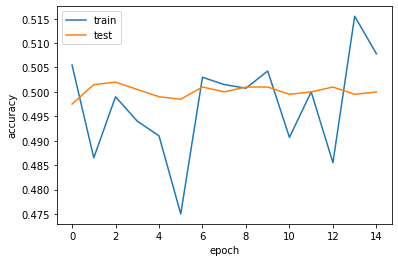

In [53]:
#plotting the accuracy
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 3 with VGG16

In [54]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)

58892288/58889256 [==============================] - 0s 0us/step


In [55]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [57]:
training = model3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_samples,epochs=15,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 23s 221ms/step - loss: 0.7232 - accuracy: 0.5610 - val_loss: 0.5046 - val_accuracy: 0.8120
Epoch 2/15
100/100 [==============================] - 21s 215ms/step - loss: 0.5333 - accuracy: 0.7436 - val_loss: 0.3691 - val_accuracy: 0.8500
Epoch 3/15
100/100 [==============================] - 22s 217ms/step - loss: 0.4083 - accuracy: 0.8120 - val_loss: 0.3003 - val_accuracy: 0.8725
Epoch 4/15
100/100 [==============================] - 22s 215ms/step - loss: 0.3538 - accuracy: 0.8424 - val_loss: 0.2817 - val_accuracy: 0.8745
Epoch 5/15
100/100 [==============================] - 21s 214ms/step - loss: 0.2743 - accuracy: 0.8757 - val_loss: 0.2461 - val_accuracy: 0.8950
Epoch 6/15
100/100 [==============================] - 22s 217ms/step - loss: 0.2627 - accuracy: 0.8743 - val_loss: 0.2437 - val_accuracy: 0.8980
Epoch 7/15
100/100 [==============================] - 21s 215ms/step - loss: 0.2576 - accuracy: 0.8846 - val_loss: 0.2211 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


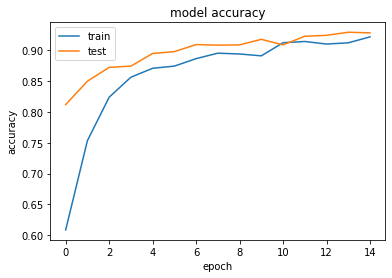

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.]]
Prediction: Cat


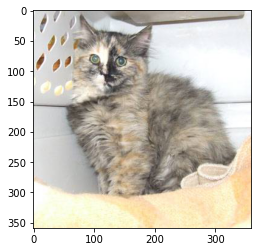

In [63]:
#predict the image
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred = image.load_img('test_set/test_set/cats/cat.4005.jpg', target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction='Dog'
else:
  prediction = 'Cat'

print('Prediction:', prediction)

img=mpimg.imread('test_set/test_set/cats/cat.4005.jpg')
imgplot = plt.imshow(img)
plt.show()

# Summary

We have compiled 3 models here to see the performance with different combinations.

**Model1:** This is a basic model built with single set of different layers. I have just used a Convolution Layer, MaxPooling Layer, Flatten, Activation and Dense layers in this model. Dropout layer is included initially however, removed later to get better accuracy.This model resulted in an accuracy of 71%.

**Model2:** This model is enhanced with sets of layers to check the performance. However, the accuracy fell down to 50% with multiple layers. Model1 eventhough simple proved to be better in terms of accuracy.

**Model3:** I have used VGG16 pre-trained model for this model. The weights are retained from VGG16 pre-trained model for all the layers except the last layer. Only the last layer is customized and trained. This model proved to be better compared to previous 2 models with an accuracy of 93%.